In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import f1_score,precision_recall_curve
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv("E:/credit_data.csv")

In [5]:
x = df.drop('Class', axis = 1)
y=df["Class"]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.20, random_state = 42)

In [7]:
x_train

,Unnamed: 0,Unnamed: 0.1,Time,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
21681,21681,23449,32775,1.347124,-0.756103,-0.485562,-0.966840,-0.186858,0.106759,-0.424865,...,0.182244,0.182400,0.317349,-0.310572,-1.294649,0.698228,-0.005657,-0.008649,0.003711,80.65
37451,37451,41458,40750,1.292058,-1.176490,0.476944,-1.299234,-1.338491,-0.239934,-0.929313,...,-0.234436,-0.091573,0.095952,0.073516,0.094875,0.197534,-0.176136,0.056805,0.029614,74.35
31446,31446,34550,37761,1.149668,-0.218937,0.976193,0.592396,-0.627022,0.446609,-0.648101,...,0.037539,-0.061797,-0.012451,-0.095307,-0.279938,0.343006,0.336120,0.015020,0.015776,28.64
20416,20416,22035,32005,-0.397617,1.037761,1.152484,-0.183517,0.436109,0.001688,0.527050,...,0.102359,-0.206759,-0.518065,-0.043515,-0.357865,-0.218828,0.104348,0.258938,0.081262,1.78
42374,42374,47044,43142,0.804936,-0.340990,0.349836,1.613435,-0.484866,-0.312666,0.306011,...,0.152113,0.025116,-0.088840,-0.175565,0.416643,0.554586,-0.350949,0.007339,0.049518,182.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11284,12066,20776,0.979914,-1.329955,1.549326,-1.450643,-1.634201,1.107456,-1.677094,...,-0.189755,0.079651,1.059096,-0.196894,-0.269721,0.509390,-0.494726,0.149213,0.019586,51.42
44732,44732,49845,44331,-1.389232,0.075387,0.793561,-0.017166,0.746710,1.382569,0.019420,...,-0.768523,-0.568517,-0.911993,-0.129955,-1.073607,-0.731871,-0.679300,-0.706102,-0.604839,38.00
38158,38158,42261,41090,-0.936760,0.995775,1.261486,1.055980,-0.302834,-0.089906,-0.036741,...,0.183907,0.082818,0.058381,-0.007619,-0.036788,-0.263000,-0.374954,0.276417,0.105328,36.00
860,860,931,599,1.336956,0.290432,-0.387642,0.166746,0.566887,0.250640,-0.025773,...,0.011537,-0.345224,-1.001077,-0.101089,-1.427888,0.431128,0.182826,-0.026270,0.003876,0.99


In [8]:
x_test

,Unnamed: 0,Unnamed: 0.1,Time,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
21697,21697,23465,32782,-0.405225,-0.190637,0.970736,-2.242655,-1.342921,-0.744379,-0.376720,...,-0.364015,0.015640,0.246809,0.225142,0.395429,-0.308665,-0.418548,-0.051923,-0.017399,61.92
6049,6049,6487,7587,1.025341,-0.708149,0.941277,-0.066131,-1.051823,-0.037449,-0.802394,...,0.266742,0.065926,0.173485,-0.207172,-0.399911,0.031019,1.491184,-0.109930,0.026895,149.70
10454,10454,11210,19299,-0.527828,0.766796,1.300672,-0.064765,0.822441,-0.063533,0.481006,...,-0.038877,-0.419957,-0.769609,-0.054921,-0.880059,-0.706348,0.008004,0.068008,-0.036014,2.58
41884,41884,46501,42889,1.276093,-0.623650,0.465249,-0.682011,-0.813073,-0.111986,-0.636771,...,0.107840,0.071060,0.203707,-0.000756,0.046036,0.384526,-0.292694,0.022624,0.006336,30.00
4104,4104,4390,3756,-0.209595,-0.546688,1.352906,-1.261824,0.435325,0.571316,-1.447447,...,-0.138387,0.748047,-0.513380,-1.081378,-0.659909,-0.115635,-0.534156,0.232919,0.259636,116.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20728,20728,22381,32223,1.214981,-0.607984,-0.108481,-0.516610,-0.729702,-0.539653,-0.458545,...,0.277882,-0.001373,-0.191285,-0.135158,-0.051916,0.464171,-0.307405,0.003281,0.038686,91.74
8508,8508,9097,12538,0.028046,1.021754,1.663999,3.087881,0.434272,0.614962,0.332725,...,0.063835,-0.250012,-0.107587,0.267609,-0.072125,-1.439994,-0.240862,-0.012166,0.004115,3.79
43256,43256,48080,43576,-0.453240,-0.627200,1.740273,-2.406306,-1.287454,-0.590506,0.023236,...,-0.039248,-0.102047,-0.192239,0.359857,0.481151,-0.592172,-0.669414,0.124128,0.162004,117.70
7279,7279,7814,10749,-1.181566,-0.002515,2.947245,-0.632055,-0.091231,-0.493602,-0.206854,...,0.220110,-0.028560,0.266054,-0.212033,0.535448,0.163824,0.958013,0.004123,-0.110552,17.00


In [9]:
y_train

21681    0
37451    0
31446    0
20416    0
42374    0
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: Class, Length: 37532, dtype: int64

In [10]:
y_test

21697    0
6049     0
10454    0
41884    0
4104     0
        ..
20728    0
8508     0
43256    0
7279     0
34146    0
Name: Class, Length: 9384, dtype: int64

In [11]:
d_train=pd.concat([x_train,y_train],axis=1)
d_train

,Unnamed: 0,Unnamed: 0.1,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
21681,21681,23449,32775,1.347124,-0.756103,-0.485562,-0.966840,-0.186858,0.106759,-0.424865,...,0.182400,0.317349,-0.310572,-1.294649,0.698228,-0.005657,-0.008649,0.003711,80.65,0
37451,37451,41458,40750,1.292058,-1.176490,0.476944,-1.299234,-1.338491,-0.239934,-0.929313,...,-0.091573,0.095952,0.073516,0.094875,0.197534,-0.176136,0.056805,0.029614,74.35,0
31446,31446,34550,37761,1.149668,-0.218937,0.976193,0.592396,-0.627022,0.446609,-0.648101,...,-0.061797,-0.012451,-0.095307,-0.279938,0.343006,0.336120,0.015020,0.015776,28.64,0
20416,20416,22035,32005,-0.397617,1.037761,1.152484,-0.183517,0.436109,0.001688,0.527050,...,-0.206759,-0.518065,-0.043515,-0.357865,-0.218828,0.104348,0.258938,0.081262,1.78,0
42374,42374,47044,43142,0.804936,-0.340990,0.349836,1.613435,-0.484866,-0.312666,0.306011,...,0.025116,-0.088840,-0.175565,0.416643,0.554586,-0.350949,0.007339,0.049518,182.64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11284,12066,20776,0.979914,-1.329955,1.549326,-1.450643,-1.634201,1.107456,-1.677094,...,0.079651,1.059096,-0.196894,-0.269721,0.509390,-0.494726,0.149213,0.019586,51.42,0
44732,44732,49845,44331,-1.389232,0.075387,0.793561,-0.017166,0.746710,1.382569,0.019420,...,-0.568517,-0.911993,-0.129955,-1.073607,-0.731871,-0.679300,-0.706102,-0.604839,38.00,0
38158,38158,42261,41090,-0.936760,0.995775,1.261486,1.055980,-0.302834,-0.089906,-0.036741,...,0.082818,0.058381,-0.007619,-0.036788,-0.263000,-0.374954,0.276417,0.105328,36.00,0
860,860,931,599,1.336956,0.290432,-0.387642,0.166746,0.566887,0.250640,-0.025773,...,-0.345224,-1.001077,-0.101089,-1.427888,0.431128,0.182826,-0.026270,0.003876,0.99,0


In [12]:
class0=d_train[d_train["Class"]==0]
class1=d_train[d_train["Class"]==1]

In [13]:
class0.head()

,Unnamed: 0,Unnamed: 0.1,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
21681,21681,23449,32775,1.347124,-0.756103,-0.485562,-0.966840,-0.186858,0.106759,-0.424865,...,0.182400,0.317349,-0.310572,-1.294649,0.698228,-0.005657,-0.008649,0.003711,80.65,0
37451,37451,41458,40750,1.292058,-1.176490,0.476944,-1.299234,-1.338491,-0.239934,-0.929313,...,-0.091573,0.095952,0.073516,0.094875,0.197534,-0.176136,0.056805,0.029614,74.35,0
31446,31446,34550,37761,1.149668,-0.218937,0.976193,0.592396,-0.627022,0.446609,-0.648101,...,-0.061797,-0.012451,-0.095307,-0.279938,0.343006,0.336120,0.015020,0.015776,28.64,0
20416,20416,22035,32005,-0.397617,1.037761,1.152484,-0.183517,0.436109,0.001688,0.527050,...,-0.206759,-0.518065,-0.043515,-0.357865,-0.218828,0.104348,0.258938,0.081262,1.78,0
42374,42374,47044,43142,0.804936,-0.340990,0.349836,1.613435,-0.484866,-0.312666,0.306011,...,0.025116,-0.088840,-0.175565,0.416643,0.554586,-0.350949,0.007339,0.049518,182.64,0


In [14]:
class1.head()

,Unnamed: 0,Unnamed: 0.1,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11,11,13,8090,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,...,0.454032,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,1.00,1
52,52,57,25198,-15.903635,10.393917,-19.133602,6.185969,-12.538021,-4.027030,-13.897827,...,1.577548,-1.280137,-0.601295,0.040404,0.995502,-0.273743,1.688136,0.527831,99.99,1
23,23,26,11092,0.378275,3.914797,-5.726872,6.094141,1.698875,-2.807314,-0.591118,...,0.149896,-0.601967,-0.613724,-0.403114,1.568445,0.521884,0.527938,0.411910,1.00,1
83,83,90,34634,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,...,0.469212,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,18.96,1
33,33,36,14073,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.00,1


In [15]:
frames = ['Time', 'Amount']
x= d_train[frames]
y=d_train.drop(frames, axis=1)

In [16]:
x.head()

,Time,Amount
21681,32775,80.65
37451,40750,74.35
31446,37761,28.64
20416,32005,1.78
42374,43142,182.64


In [17]:
y.head()

,Unnamed: 0,Unnamed: 0.1,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
21681,21681,23449,1.347124,-0.756103,-0.485562,-0.966840,-0.186858,0.106759,-0.424865,-0.041787,...,0.182244,0.182400,0.317349,-0.310572,-1.294649,0.698228,-0.005657,-0.008649,0.003711,0
37451,37451,41458,1.292058,-1.176490,0.476944,-1.299234,-1.338491,-0.239934,-0.929313,-0.050408,...,-0.234436,-0.091573,0.095952,0.073516,0.094875,0.197534,-0.176136,0.056805,0.029614,0
31446,31446,34550,1.149668,-0.218937,0.976193,0.592396,-0.627022,0.446609,-0.648101,0.202180,...,0.037539,-0.061797,-0.012451,-0.095307,-0.279938,0.343006,0.336120,0.015020,0.015776,0
20416,20416,22035,-0.397617,1.037761,1.152484,-0.183517,0.436109,0.001688,0.527050,0.230434,...,0.102359,-0.206759,-0.518065,-0.043515,-0.357865,-0.218828,0.104348,0.258938,0.081262,0
42374,42374,47044,0.804936,-0.340990,0.349836,1.613435,-0.484866,-0.312666,0.306011,-0.081873,...,0.152113,0.025116,-0.088840,-0.175565,0.416643,0.554586,-0.350949,0.007339,0.049518,0


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
temp_col=scaler.fit_transform(x)
pd.DataFrame(temp_col)

,0,1
0,0.258193,0.857553
1,0.855842,0.724163
2,0.631846,-0.243651
3,0.200489,-0.812356
4,1.035099,3.016979
...,...,...
37527,-0.641015,0.238668
37528,1.124204,-0.045473
37529,0.881322,-0.087818
37530,-2.153086,-0.829083


In [21]:
scaled_col = pd.DataFrame(temp_col, columns=frames)
scaled_col

,Time,Amount
0,0.258193,0.857553
1,0.855842,0.724163
2,0.631846,-0.243651
3,0.200489,-0.812356
4,1.035099,3.016979
...,...,...
37527,-0.641015,0.238668
37528,1.124204,-0.045473
37529,0.881322,-0.087818
37530,-2.153086,-0.829083


In [22]:
d_temp = d_train.drop(frames, axis=1)
d_temp

,Unnamed: 0,Unnamed: 0.1,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
21681,21681,23449,1.347124,-0.756103,-0.485562,-0.966840,-0.186858,0.106759,-0.424865,-0.041787,...,0.182244,0.182400,0.317349,-0.310572,-1.294649,0.698228,-0.005657,-0.008649,0.003711,0
37451,37451,41458,1.292058,-1.176490,0.476944,-1.299234,-1.338491,-0.239934,-0.929313,-0.050408,...,-0.234436,-0.091573,0.095952,0.073516,0.094875,0.197534,-0.176136,0.056805,0.029614,0
31446,31446,34550,1.149668,-0.218937,0.976193,0.592396,-0.627022,0.446609,-0.648101,0.202180,...,0.037539,-0.061797,-0.012451,-0.095307,-0.279938,0.343006,0.336120,0.015020,0.015776,0
20416,20416,22035,-0.397617,1.037761,1.152484,-0.183517,0.436109,0.001688,0.527050,0.230434,...,0.102359,-0.206759,-0.518065,-0.043515,-0.357865,-0.218828,0.104348,0.258938,0.081262,0
42374,42374,47044,0.804936,-0.340990,0.349836,1.613435,-0.484866,-0.312666,0.306011,-0.081873,...,0.152113,0.025116,-0.088840,-0.175565,0.416643,0.554586,-0.350949,0.007339,0.049518,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11284,12066,0.979914,-1.329955,1.549326,-1.450643,-1.634201,1.107456,-1.677094,0.606960,...,-0.189755,0.079651,1.059096,-0.196894,-0.269721,0.509390,-0.494726,0.149213,0.019586,0
44732,44732,49845,-1.389232,0.075387,0.793561,-0.017166,0.746710,1.382569,0.019420,0.316933,...,-0.768523,-0.568517,-0.911993,-0.129955,-1.073607,-0.731871,-0.679300,-0.706102,-0.604839,0
38158,38158,42261,-0.936760,0.995775,1.261486,1.055980,-0.302834,-0.089906,-0.036741,0.652149,...,0.183907,0.082818,0.058381,-0.007619,-0.036788,-0.263000,-0.374954,0.276417,0.105328,0
860,860,931,1.336956,0.290432,-0.387642,0.166746,0.566887,0.250640,-0.025773,0.030424,...,0.011537,-0.345224,-1.001077,-0.101089,-1.427888,0.431128,0.182826,-0.026270,0.003876,0


In [23]:
d_temp.reset_index()

,index,Unnamed: 0,Unnamed: 0.1,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,21681,21681,23449,1.347124,-0.756103,-0.485562,-0.966840,-0.186858,0.106759,-0.424865,...,0.182244,0.182400,0.317349,-0.310572,-1.294649,0.698228,-0.005657,-0.008649,0.003711,0
1,37451,37451,41458,1.292058,-1.176490,0.476944,-1.299234,-1.338491,-0.239934,-0.929313,...,-0.234436,-0.091573,0.095952,0.073516,0.094875,0.197534,-0.176136,0.056805,0.029614,0
2,31446,31446,34550,1.149668,-0.218937,0.976193,0.592396,-0.627022,0.446609,-0.648101,...,0.037539,-0.061797,-0.012451,-0.095307,-0.279938,0.343006,0.336120,0.015020,0.015776,0
3,20416,20416,22035,-0.397617,1.037761,1.152484,-0.183517,0.436109,0.001688,0.527050,...,0.102359,-0.206759,-0.518065,-0.043515,-0.357865,-0.218828,0.104348,0.258938,0.081262,0
4,42374,42374,47044,0.804936,-0.340990,0.349836,1.613435,-0.484866,-0.312666,0.306011,...,0.152113,0.025116,-0.088840,-0.175565,0.416643,0.554586,-0.350949,0.007339,0.049518,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37527,11284,11284,12066,0.979914,-1.329955,1.549326,-1.450643,-1.634201,1.107456,-1.677094,...,-0.189755,0.079651,1.059096,-0.196894,-0.269721,0.509390,-0.494726,0.149213,0.019586,0
37528,44732,44732,49845,-1.389232,0.075387,0.793561,-0.017166,0.746710,1.382569,0.019420,...,-0.768523,-0.568517,-0.911993,-0.129955,-1.073607,-0.731871,-0.679300,-0.706102,-0.604839,0
37529,38158,38158,42261,-0.936760,0.995775,1.261486,1.055980,-0.302834,-0.089906,-0.036741,...,0.183907,0.082818,0.058381,-0.007619,-0.036788,-0.263000,-0.374954,0.276417,0.105328,0
37530,860,860,931,1.336956,0.290432,-0.387642,0.166746,0.566887,0.250640,-0.025773,...,0.011537,-0.345224,-1.001077,-0.101089,-1.427888,0.431128,0.182826,-0.026270,0.003876,0


In [24]:
d_=d_temp.reset_index().drop("index",axis=1)
d_.head()

,Unnamed: 0,Unnamed: 0.1,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,21681,23449,1.347124,-0.756103,-0.485562,-0.966840,-0.186858,0.106759,-0.424865,-0.041787,...,0.182244,0.182400,0.317349,-0.310572,-1.294649,0.698228,-0.005657,-0.008649,0.003711,0
1,37451,41458,1.292058,-1.176490,0.476944,-1.299234,-1.338491,-0.239934,-0.929313,-0.050408,...,-0.234436,-0.091573,0.095952,0.073516,0.094875,0.197534,-0.176136,0.056805,0.029614,0
2,31446,34550,1.149668,-0.218937,0.976193,0.592396,-0.627022,0.446609,-0.648101,0.202180,...,0.037539,-0.061797,-0.012451,-0.095307,-0.279938,0.343006,0.336120,0.015020,0.015776,0
3,20416,22035,-0.397617,1.037761,1.152484,-0.183517,0.436109,0.001688,0.527050,0.230434,...,0.102359,-0.206759,-0.518065,-0.043515,-0.357865,-0.218828,0.104348,0.258938,0.081262,0
4,42374,47044,0.804936,-0.340990,0.349836,1.613435,-0.484866,-0.312666,0.306011,-0.081873,...,0.152113,0.025116,-0.088840,-0.175565,0.416643,0.554586,-0.350949,0.007339,0.049518,0


In [25]:
d_scaled = pd.concat([scaled_col, d_], axis =1)
d_scaled

,Time,Amount,Unnamed: 0,Unnamed: 0.1,V1,V2,V3,V4,V5,V6,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.258193,0.857553,21681,23449,1.347124,-0.756103,-0.485562,-0.966840,-0.186858,0.106759,...,0.182244,0.182400,0.317349,-0.310572,-1.294649,0.698228,-0.005657,-0.008649,0.003711,0
1,0.855842,0.724163,37451,41458,1.292058,-1.176490,0.476944,-1.299234,-1.338491,-0.239934,...,-0.234436,-0.091573,0.095952,0.073516,0.094875,0.197534,-0.176136,0.056805,0.029614,0
2,0.631846,-0.243651,31446,34550,1.149668,-0.218937,0.976193,0.592396,-0.627022,0.446609,...,0.037539,-0.061797,-0.012451,-0.095307,-0.279938,0.343006,0.336120,0.015020,0.015776,0
3,0.200489,-0.812356,20416,22035,-0.397617,1.037761,1.152484,-0.183517,0.436109,0.001688,...,0.102359,-0.206759,-0.518065,-0.043515,-0.357865,-0.218828,0.104348,0.258938,0.081262,0
4,1.035099,3.016979,42374,47044,0.804936,-0.340990,0.349836,1.613435,-0.484866,-0.312666,...,0.152113,0.025116,-0.088840,-0.175565,0.416643,0.554586,-0.350949,0.007339,0.049518,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37527,-0.641015,0.238668,11284,12066,0.979914,-1.329955,1.549326,-1.450643,-1.634201,1.107456,...,-0.189755,0.079651,1.059096,-0.196894,-0.269721,0.509390,-0.494726,0.149213,0.019586,0
37528,1.124204,-0.045473,44732,49845,-1.389232,0.075387,0.793561,-0.017166,0.746710,1.382569,...,-0.768523,-0.568517,-0.911993,-0.129955,-1.073607,-0.731871,-0.679300,-0.706102,-0.604839,0
37529,0.881322,-0.087818,38158,42261,-0.936760,0.995775,1.261486,1.055980,-0.302834,-0.089906,...,0.183907,0.082818,0.058381,-0.007619,-0.036788,-0.263000,-0.374954,0.276417,0.105328,0
37530,-2.153086,-0.829083,860,931,1.336956,0.290432,-0.387642,0.166746,0.566887,0.250640,...,0.011537,-0.345224,-1.001077,-0.101089,-1.427888,0.431128,0.182826,-0.026270,0.003876,0


In [26]:
X___= d_scaled.drop('Class', axis = 1)
Y___=pd.DataFrame(d_scaled["Class"])
Y___

,Class
0,0
1,0
2,0
3,0
4,0
...,...
37527,0
37528,0
37529,0
37530,0


In [27]:
"""# Dimensionality Reduction"""

from sklearn.decomposition import PCA

pca = PCA(n_components=15)

X_temp_reduced = pca.fit_transform(d_scaled)

In [28]:
X_temp_reduced = pca.fit_transform(X___)
X_reduce=pd.DataFrame(X_temp_reduced)
X_reduce

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2865.865202,-197.665487,-0.514373,1.475473,1.622633,-0.979850,-0.658877,0.309707,-0.579754,0.380367,0.569064,-0.416922,-2.174017,0.491159,-0.479909
1,21070.550777,57.229507,-0.719401,1.596472,1.710868,0.518786,-1.456698,0.102684,-0.167747,0.088402,1.152522,-1.073903,-0.492138,-1.354190,0.892906
2,11918.315388,-73.446212,-0.624048,1.060233,-0.334913,-0.009201,0.366346,-0.431887,-0.282510,-0.538891,0.005750,0.414445,0.648082,-0.027981,1.628264
3,-4763.131944,-197.704116,0.098220,-0.490449,-0.573625,-0.346558,-0.159181,1.440216,0.266852,0.361291,-0.597650,0.439723,1.202165,-0.542939,0.165583
4,28516.102068,112.826906,-0.307397,1.064239,-0.590305,1.108913,0.419393,-1.341970,-1.034131,-0.346765,0.480407,-0.490275,-0.286922,0.229357,0.963651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37527,-18281.607066,-38.890937,-1.182697,0.980728,2.063737,1.234868,0.353730,-3.827249,1.121645,-2.568744,-1.143172,0.893290,2.200264,2.400595,0.911507
37528,32175.829680,223.094795,0.255323,-1.104975,0.089939,-0.544980,0.618606,0.530184,0.230001,0.416378,0.388454,-1.217660,2.018438,-1.638433,0.324290
37529,22140.403830,65.740991,0.650962,-0.547411,-1.016308,0.016597,-0.068169,0.032935,-0.089420,0.479633,-0.343490,0.190363,0.308912,-0.922457,-1.061508
37530,-33530.524790,305.345665,-0.921325,1.183957,-0.050534,-1.618313,-0.375208,2.027442,-2.154249,0.813316,0.383672,0.315825,-0.100209,0.574283,0.949497


In [29]:
X_temp_reduced

array([[-2.86586520e+03, -1.97665487e+02, -5.14373111e-01, ...,
        -2.17401726e+00,  4.91158620e-01, -4.79909068e-01],
       [ 2.10705508e+04,  5.72295069e+01, -7.19400790e-01, ...,
        -4.92138049e-01, -1.35419038e+00,  8.92905831e-01],
       [ 1.19183154e+04, -7.34462115e+01, -6.24047574e-01, ...,
         6.48082100e-01, -2.79807392e-02,  1.62826351e+00],
       ...,
       [ 2.21404038e+04,  6.57409913e+01,  6.50961904e-01, ...,
         3.08912178e-01, -9.22456764e-01, -1.06150773e+00],
       [-3.35305248e+04,  3.05345665e+02, -9.21324829e-01, ...,
        -1.00208805e-01,  5.74283410e-01,  9.49496527e-01],
       [-1.16317051e+04, -1.42321639e+02, -2.32419350e-02, ...,
         6.84480709e-01,  1.49582349e+00,  2.70537477e-01]])

In [30]:
new_data=pd.concat([X_reduce,Y___],axis=1)
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Class
0,-2865.865202,-197.665487,-0.514373,1.475473,1.622633,-0.979850,-0.658877,0.309707,-0.579754,0.380367,0.569064,-0.416922,-2.174017,0.491159,-0.479909,0
1,21070.550777,57.229507,-0.719401,1.596472,1.710868,0.518786,-1.456698,0.102684,-0.167747,0.088402,1.152522,-1.073903,-0.492138,-1.354190,0.892906,0
2,11918.315388,-73.446212,-0.624048,1.060233,-0.334913,-0.009201,0.366346,-0.431887,-0.282510,-0.538891,0.005750,0.414445,0.648082,-0.027981,1.628264,0
3,-4763.131944,-197.704116,0.098220,-0.490449,-0.573625,-0.346558,-0.159181,1.440216,0.266852,0.361291,-0.597650,0.439723,1.202165,-0.542939,0.165583,0
4,28516.102068,112.826906,-0.307397,1.064239,-0.590305,1.108913,0.419393,-1.341970,-1.034131,-0.346765,0.480407,-0.490275,-0.286922,0.229357,0.963651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37527,-18281.607066,-38.890937,-1.182697,0.980728,2.063737,1.234868,0.353730,-3.827249,1.121645,-2.568744,-1.143172,0.893290,2.200264,2.400595,0.911507,0
37528,32175.829680,223.094795,0.255323,-1.104975,0.089939,-0.544980,0.618606,0.530184,0.230001,0.416378,0.388454,-1.217660,2.018438,-1.638433,0.324290,0
37529,22140.403830,65.740991,0.650962,-0.547411,-1.016308,0.016597,-0.068169,0.032935,-0.089420,0.479633,-0.343490,0.190363,0.308912,-0.922457,-1.061508,0
37530,-33530.524790,305.345665,-0.921325,1.183957,-0.050534,-1.618313,-0.375208,2.027442,-2.154249,0.813316,0.383672,0.315825,-0.100209,0.574283,0.949497,0


In [31]:
df = df.rename(columns={"Category":"Pet"})


In [32]:
X_train, X_test, y_train, y_test= train_test_split(x,y['Class'], test_size = 0.25, random_state = 42)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA 

In [34]:
print(X_train.shape)
print(X_test.shape)

(28149, 2)
(9383, 2)


In [35]:
print(y_train.shape)
print(y_test.shape)

(28149,)
(9383,)


In [36]:
 import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

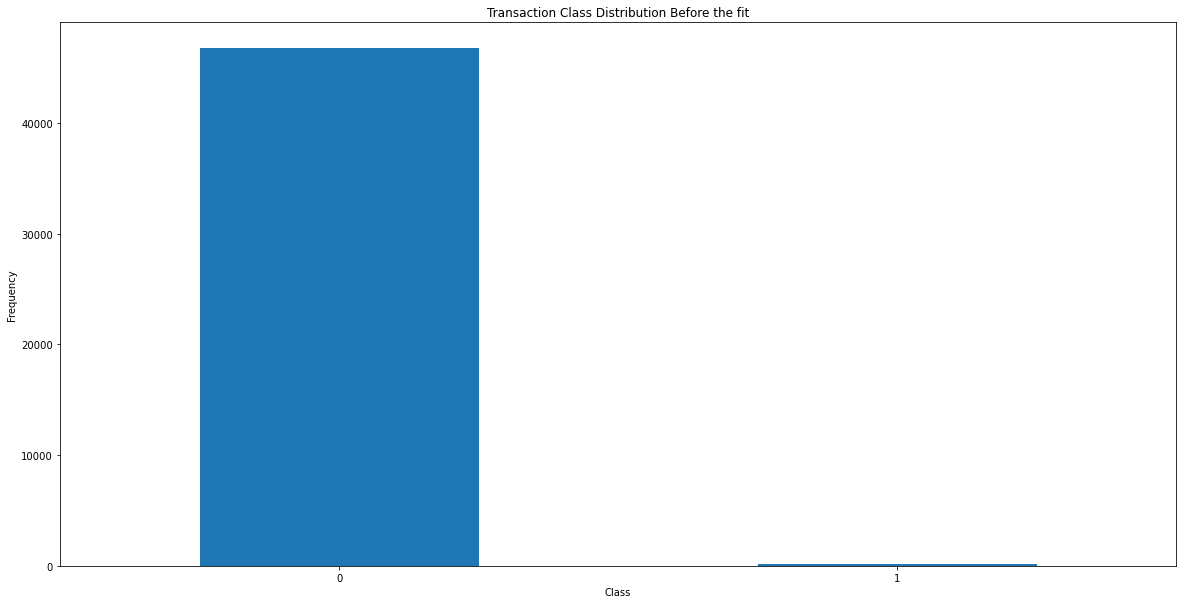

In [37]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0,figsize=(20,10))

plt.title("Transaction Class Distribution Before the fit")

plt.xlabel("Class")

plt.ylabel("Frequency")


In [38]:
!pip install --user imblearn

In [40]:
print(y_train.value_counts())
print(y_test.value_counts())

0    28050
1       99
Name: Class, dtype: int64
0    9364
1      19
Name: Class, dtype: int64


In [41]:
from collections import Counter 
Counter(y_train)

Counter({0: 28050, 1: 99})

# SMOTE (Synthetic Minority Oversampling Technique) – Oversampling

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(0.7,random_state = 42)

In [43]:
X_train_Smote, Y_train_Smote=sm.fit_resample(X_train,y_train)

In [44]:
X_train_Smote

,Time,Amount
0,41252,52.820000
1,40650,8.990000
2,41313,49.950000
3,5344,18.510000
4,33886,35.900000
...,...,...
47680,19011,1.000000
47681,17188,3.790000
47682,8748,1.078897
47683,35877,11.143733


In [45]:
d_smote = pd.concat([X_train_Smote,Y_train_Smote], axis =1)
d_smote

,Time,Amount,Class
0,41252,52.820000,0
1,40650,8.990000,0
2,41313,49.950000,0
3,5344,18.510000,0
4,33886,35.900000,0
...,...,...,...
47680,19011,1.000000,1
47681,17188,3.790000,1
47682,8748,1.078897,1
47683,35877,11.143733,1


In [46]:
print("The Number of classes Before the fit {}".format(Counter(y_train)))
print("The Number of classes After the fit {}".format(Counter(Y_train_Smote)))

The Number of classes Before the fit Counter({0: 28050, 1: 99})
The Number of classes After the fit Counter({0: 28050, 1: 19635})


In [47]:
class0_ = d_smote[d_smote['Class']==0]
class0_

,Time,Amount,Class
0,41252,52.82,0
1,40650,8.99,0
2,41313,49.95,0
3,5344,18.51,0
4,33886,35.90,0
...,...,...,...
28144,35706,5.90,0
28145,4830,1.98,0
28146,44625,1.79,0
28147,16634,7.33,0


In [48]:
class1_ = d_smote[d_smote['Class']==1]
class1_.tail(n=20)

,Time,Amount,Class
47665,8790,1.065914,1
47666,41213,1.461053,1
47667,35801,43.620674,1
47668,40622,35.677312,1
47669,40790,0.921929,1
47670,41239,90.745121,1
47671,20697,1.000000,1
47672,41241,39.662797,1
47673,17387,1.808806,1
47674,30453,76.997731,1


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log_class=LogisticRegression()
# hyper tuning parameter 
#grid={'c':10.0**np.arange(-2,3),"penalty":["l1","l2"]}
#cv=KFold(n_splits=5,random_state=None,shuffle=False)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [51]:
#clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=None,scoring="f1_macro")

In [52]:
log_class.fit(X_train_Smote,Y_train_Smote)

LogisticRegression()

In [53]:
y_pred=log_class.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[9364    0]
 [  19    0]]
0.9979750612810402
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9364
           1       0.00      0.00      0.00        19

    accuracy                           1.00      9383
   macro avg       0.50      0.50      0.50      9383
weighted avg       1.00      1.00      1.00      9383



In [54]:
import numpy as np

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_Smote,Y_train_Smote)

RandomForestClassifier()

In [56]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8839  525]
 [   7   12]]
0.943301715869125
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      9364
           1       0.02      0.63      0.04        19

    accuracy                           0.94      9383
   macro avg       0.51      0.79      0.51      9383
weighted avg       1.00      0.94      0.97      9383



In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:

dtree = DecisionTreeClassifier()
dtree.fit(X_train_Smote, Y_train_Smote)


DecisionTreeClassifier()

In [59]:
y_pred=dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8737  627]
 [   8   11]]
0.9323244164979217
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9364
           1       0.02      0.58      0.03        19

    accuracy                           0.93      9383
   macro avg       0.51      0.76      0.50      9383
weighted avg       1.00      0.93      0.96      9383



In [60]:
from sklearn.svm import SVC


In [61]:
svc = SVC(kernel='rbf')
svc.fit(X_train_Smote, Y_train_Smote)


SVC()

In [62]:
y_pred=svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8233 1131]
 [  13    6]]
0.8780773739742087
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      9364
           1       0.01      0.32      0.01        19

    accuracy                           0.88      9383
   macro avg       0.50      0.60      0.47      9383
weighted avg       1.00      0.88      0.93      9383



In [63]:
from sklearn.neighbors import KNeighborsClassifier


In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_Smote, Y_train_Smote)

KNeighborsClassifier()

In [65]:
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8255 1109]
 [   7   12]]
0.8810614941916232
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      9364
           1       0.01      0.63      0.02        19

    accuracy                           0.88      9383
   macro avg       0.50      0.76      0.48      9383
weighted avg       1.00      0.88      0.93      9383



In [66]:
!pip install xgboost

In [67]:
import pickle     

In [68]:
file = open('Fraud_Detection.pkl', 'wb')
pickle.dump(classifier, file)